Pierre Navaro - [Institut de Recherche Mathématique de Rennes](https://irmar.univ-rennes1.fr) - [CNRS](http://www.cnrs.fr/)

[![nbviewer](https://img.shields.io/badge/render-nbviewer-orange.svg)](http://nbviewer.jupyter.org/github/pnavaro/big-data/blob/master/09.PandasSeries.ipynb)



![pandas](http://pandas.pydata.org/_static/pandas_logo.png "Pandas Logo")


- Started by Wes MacKinney with a first release in 2011.
- Based on NumPy, it is the most used library for all things data.
- Motivated by the toolbox in R for manipulating data easily.
- A lot of names in Pandas come from R world.
- It is Open source (BSD)

https://pandas.pydata.org/

# Pandas 

```python
import pandas as pd
```

"*Pandas provides high-performance, easy-to-use data structures 
and data analysis tools in Python*"

- Self-describing data structures
- Data loaders to/from common file formats
- Plotting functions
- Basic statistical tools.


In [67]:
%reset -f
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
pd.set_option("display.max_rows", 8)
plt.rcParams['figure.figsize'] = (9, 6)

# [Series](https://pandas.pydata.org/pandas-docs/stable/dsintro.html#series)

- A Series contains a one-dimensional array of data, *and* an associated sequence of labels called the *index*.
- The index can contain numeric, string, or date/time values.
- When the index is a time value, the series is a [time series](https://en.wikipedia.org/wiki/Time_series).
- The index must be the same length as the data.
- If no index is supplied it is automatically generated as `range(len(data))`.

In [68]:
pd.Series([1,3,5,np.nan,6,8])

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64

In [69]:
pd.Series(index=pd.period_range('09/11/2017', '09/18/2017', freq="D"))

2017-09-11   NaN
2017-09-12   NaN
2017-09-13   NaN
2017-09-14   NaN
2017-09-15   NaN
2017-09-16   NaN
2017-09-17   NaN
2017-09-18   NaN
Freq: D, dtype: float64

### Exercise
- Create a text with `lorem and count word occurences with a collection.Counter. Put the result in a `dict`.

In [77]:
import string
from lorem import text
from collections import Counter
translator = str.maketrans('', '', string.punctuation)

words = []
for line in text().split("\n"):
    for word in line.strip().split(' '):
        word = word.lower().translate(translator)
        if len(word) > 0 : words.append(word)
c = Counter(words)
data = dict(c.most_common())
data

{'adipisci': 10,
 'aliquam': 8,
 'amet': 13,
 'consectetur': 9,
 'dolor': 11,
 'dolore': 13,
 'dolorem': 9,
 'eius': 7,
 'est': 8,
 'etincidunt': 8,
 'ipsum': 7,
 'labore': 9,
 'magnam': 10,
 'modi': 10,
 'neque': 6,
 'non': 12,
 'numquam': 8,
 'porro': 5,
 'quaerat': 11,
 'quiquia': 5,
 'quisquam': 9,
 'sed': 9,
 'sit': 5,
 'tempora': 9,
 'ut': 14,
 'velit': 11,
 'voluptatem': 12}

### Exercise
- From the results create a Pandas series name latin_series with words in alphabetical order as index.

In [120]:
latin_series = pd.Series(data)

### Exercise

- Plot the series using 'bar' kind.

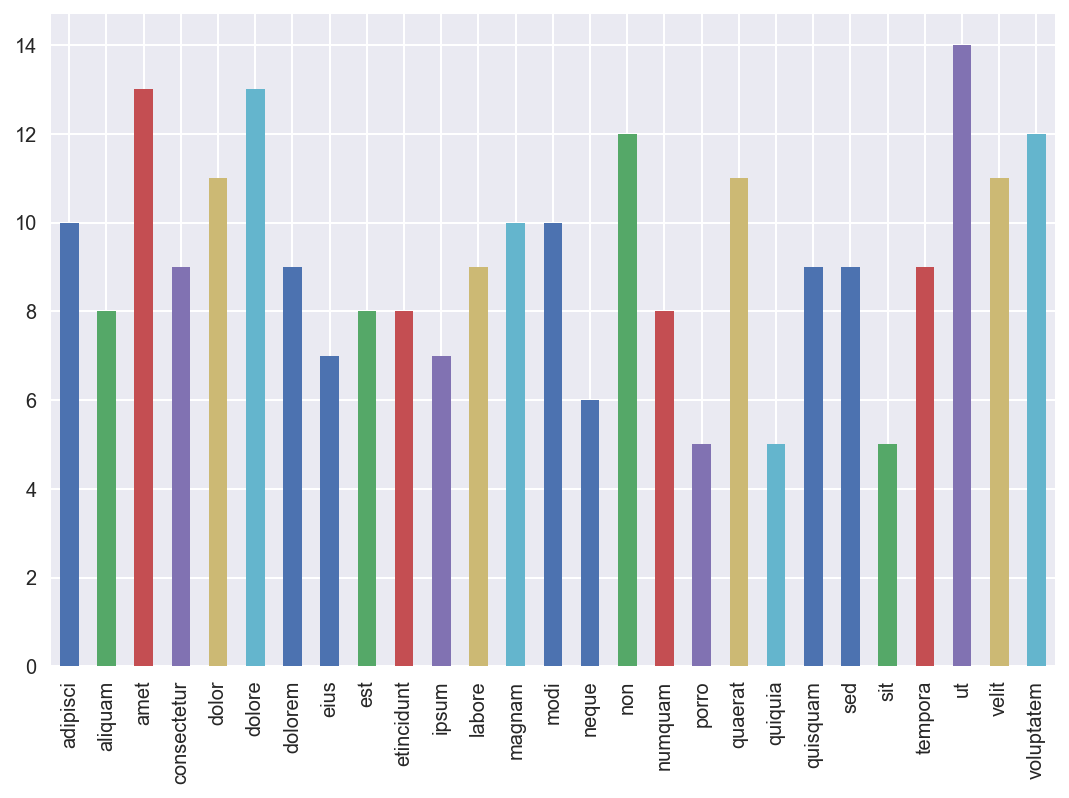

In [121]:
latin_series.plot(kind='bar');

### Exercise
- Pandas provides explicit functions for indexing `loc` and `iloc`.
    - Use `loc` to display the number of occurrences of 'dolore'.
    - Use `iloc` to diplay the number of occurrences of the last word in index.

In [75]:
latin_series.dolore
latin_series[['dolor','dolore']]

dolor     6
dolore    9
dtype: int64

In [122]:
latin_series.loc['dolore'], latin_series.iloc[-1]

(13, 12)

### Exercise
- Sort words by number of occurrences.
- Plot the Series.

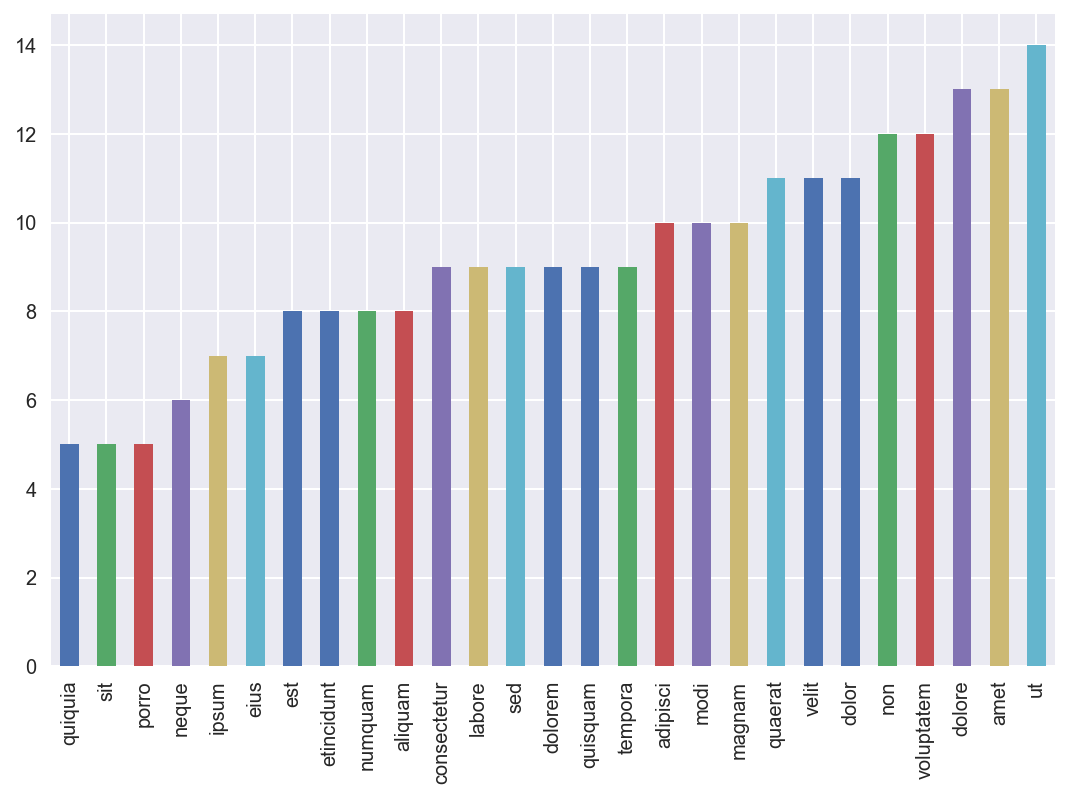

In [118]:
latin_series = latin_series.sort_values(axis=0)
latin_series.plot(kind='bar');

### Full globe temperature between 1901 and 2000.

We read the text file and load the results in a pandas dataframe. 
In cells below you need to clean the data and convert the dataframe to a time series.

In [198]:
import os
here = os.getcwd()

filename = os.path.join(here,"data","monthly.land.90S.90N.df_1901-2000mean.dat.txt")

df = pd.read_table(filename, sep="\s+", 
                                names=["year", "month", "mean temp"])

df.insert(loc=2,column='day',value=np.repeat(1,len(df)))

### Exercise
- Insert a third column with value one named "day" with `insert` method.
- convert df index to datetime with `to_datetime` function.
- convert df to Series containing only "mean temp" column.

In [197]:
df.index = pd.to_datetime(df[["year","month","day"]])
df = df["mean temp"]
print(type(df))
print(df.dtype)
print(df.shape)
print(df.nbytes)
df

<class 'pandas.core.series.Series'>
float64
(1584,)
12672


1880-01-01     -0.0235
1880-02-01     -0.4936
1880-03-01     -0.6785
1880-04-01     -0.2829
                ...   
2011-09-01   -999.0000
2011-10-01   -999.0000
2011-11-01   -999.0000
2011-12-01   -999.0000
Name: mean temp, Length: 1584, dtype: float64

### Exercise 
- Display the beginning of the file (head)

In [134]:
df.head()

,date,mean temp
1880,1,-0.0235
1880,2,-0.4936
1880,3,-0.6785
1880,4,-0.2829
1880,5,-0.1261


### Exercise 
- Display the end of the file (tail)

In [131]:
df.tail()

year
2007      0.5510
2008      0.4842
2009      0.5588
2010      0.6147
2011   -999.0000
Name: mean temp, dtype: float64

Int64Index([1880, 1881, 1882, 1883, 1884, 1885, 1886, 1887, 1888, 1889,
            ...
            2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011],
           dtype='int64', name='year', length=132)

### Create a Series from this DataFrame

In [130]:
df = df["mean temp"]
print(type(df))
print(df.dtype)
print(df.shape)
print(df.nbytes)

KeyError: 'mean temp'

# Working with dates and times

Index dtype is NumPy's new 'int64Index':

In [45]:
full_globe_temp.index.dtype

dtype('int64')

Use Real datetime index and add a flag to signal if the value is before or after the great depression's black Friday:

In [46]:
black_friday = pd.to_datetime('1929-10-29')
full_globe_temp.index  = pd.to_datetime(full_globe_temp.index,format='%Y')
full_globe_temp.index > black_friday

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

# Timestamps to periods
Convert its index from timestamp to period is more meaningfull since it was measured and averaged over the year...


In [47]:
full_globe_temp.index = full_globe_temp.index.to_period()
full_globe_temp

year
1880   -0.1373
1881   -0.0600
1882   -0.1130
1883   -0.1505
         ...  
2008    0.4842
2009    0.5588
2010    0.6147
2011       NaN
Freq: A-DEC, Name: mean temp, Length: 132, dtype: float64

In [48]:
full_globe_temp.index.dtype

period[A-DEC]

## Resampling

Series can be resample, downsample or upsample.
- Frequencies can be specified as strings: "us", "ms", "S", "T", "H", "D", "B", "W", "M", "A", "3min", "2h20", ...
- More aliases at http://pandas.pydata.org/pandas-docs/stable/timeseries.html#offset-aliases

### Series converted to 10 year blocks:

In [49]:
full_globe_temp.resample("10A").mean()

year
1880-12-31   -0.13730
1890-12-31   -0.16727
1900-12-31   -0.20713
1910-12-31   -0.31178
               ...   
1990-12-31    0.21704
2000-12-31    0.36462
2010-12-31    0.56116
2020-12-31        NaN
Freq: 10A-DEC, Name: mean temp, Length: 15, dtype: float64

### Upscale to a monthly series

In [50]:
full_globe_temp.resample("M").mean()

year
1880-01   -0.1373
1880-02       NaN
1880-03       NaN
1880-04       NaN
            ...  
2011-09       NaN
2011-10       NaN
2011-11       NaN
2011-12       NaN
Freq: M, Name: mean temp, Length: 1584, dtype: float64

## Transpose

The result is grouped in the wrong order since it sorts first the axis that was unstacked. We need to transpose the dataframe.

In [57]:
city_temp = french_cities.iloc[:,:12].transpose()
city_temp

City,Lille,Paris,Strasbourg,Brest,Rennes,Nantes,Vichy,Clermont,Lyon,Grenoble,Bordeaux,Nice,Montpellier,Toulouse,Marseille
Jan,2.4,3.4,0.4,6.1,4.8,5.0,2.4,2.6,2.1,1.5,5.6,7.5,5.6,4.7,5.5
Feb,2.9,4.1,1.5,5.8,5.3,5.3,3.4,3.7,3.3,3.2,6.6,8.5,6.7,5.6,6.6
Mar,6.0,7.6,5.6,7.8,7.9,8.4,7.1,7.5,7.7,7.7,10.3,10.8,9.9,9.2,10.0
Apr,8.9,10.7,9.8,9.2,10.1,10.8,9.9,10.3,10.9,10.6,12.8,13.3,12.8,11.6,13.0
May,12.4,14.3,14.0,11.6,13.1,13.9,13.6,13.8,14.9,14.5,15.8,16.7,16.2,14.9,16.8
Jun,15.3,17.5,17.2,14.4,16.2,17.2,17.1,17.3,18.5,17.8,19.3,20.1,20.1,18.7,20.8
Jul,17.1,19.1,19.0,15.6,17.9,18.8,19.3,19.4,20.7,20.1,20.9,22.7,22.7,20.9,23.3
Aug,17.1,18.7,18.3,16.0,17.8,18.6,18.8,19.1,20.1,19.5,21.0,22.5,22.3,20.9,22.8
Sep,14.7,16.0,15.1,14.7,15.7,16.4,16.0,16.2,16.9,16.7,18.6,20.3,19.3,18.3,19.9
Oct,10.4,11.4,9.5,12.0,11.6,12.2,11.0,11.2,11.4,11.4,13.8,16.0,14.6,13.3,15.0


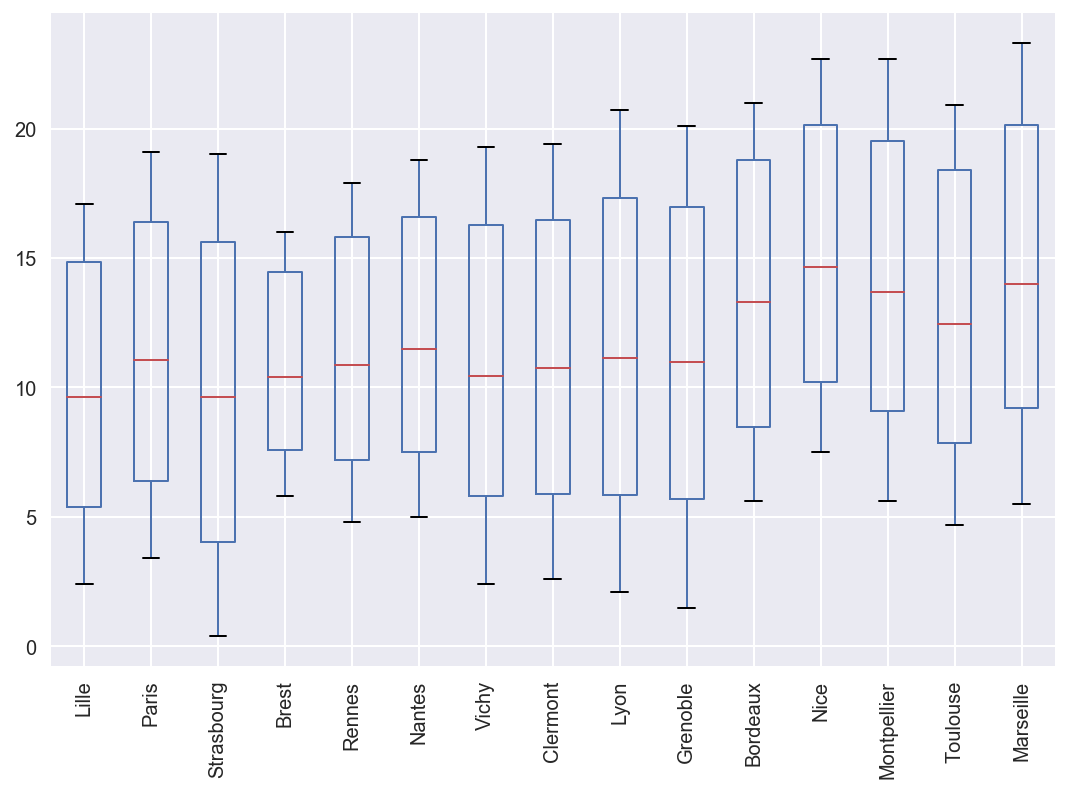

In [58]:
city_temp.boxplot(rot=90);

# Describing

In [59]:
french_cities['Région'].describe()

count     15
unique     4
top       SE
freq       7
Name: Région, dtype: object

In [60]:
french_cities['Région'].unique()

array(['NE', 'NO', 'SE', 'SO'], dtype=object)

In [61]:
french_cities['Région'].value_counts()

SE    7
NO    3
NE    3
SO    2
Name: Région, dtype: int64

In [62]:
# To save memory, we can convert it to a categorical column:
french_cities["Région"] = french_cities["Région"].astype("category")

In [63]:
french_cities.memory_usage()

Index     760
Jan       120
Feb       120
Mar       120
Apr       120
May       120
Jun       120
Jul       120
Aug       120
Sep       120
Oct       120
Nov       120
Dec       120
Lati      120
Long      120
Mean      120
Ampl      120
Région    207
dtype: int64

## Transferring R data sets into Python

In [16]:
%load_ext rpy2.ipython

- conversions of R to pandas objects will be done automatically

In [17]:
from rpy2.robjects import r, pandas2ri

pandas2ri.activate()
r.library('missMDA')
r.data('orange')
orange = r('orange')

In [18]:
x = r('c(1,2,3,4)')
type(x)


numpy.ndarray

In [19]:
v = r('seq(1:10)')
v

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10], dtype=int32)

In [20]:
orange

,Color.intensity,Odor.intensity,Attack.intensity,Sweet,Acid,Bitter,Pulp,Typicity
1,4.791667,5.291667,NaN,NaN,NaN,2.833333,NaN,5.208333
2,4.583333,6.041667,4.416667,5.458333,4.125000,3.541667,4.625000,4.458333
3,4.708333,5.333333,NaN,NaN,4.291667,3.166667,6.250000,5.166667
4,6.583333,6.000000,7.416667,4.166667,6.750000,NaN,1.416667,3.416667
5,NaN,6.166667,5.333333,4.083333,NaN,4.375000,3.416667,4.416667
6,6.333333,5.000000,5.375000,5.000000,5.500000,3.625000,4.208333,4.875000
7,4.291667,4.916667,5.291667,5.541667,5.250000,NaN,1.291667,4.333333
8,NaN,4.541667,4.833333,NaN,4.958333,2.916667,1.541667,3.958333
9,4.416667,NaN,5.166667,4.625000,5.041667,3.666667,1.541667,3.958333
10,4.541667,4.291667,NaN,5.791667,4.375000,NaN,NaN,5.000000


In [21]:
%%R

library('missMDA')
data(orange)
estim_ncpPCA(orange)

$ncp
[1] 2

$criterion
        0         1         2         3         4         5 
1.0388714 0.9279948 0.5976727 0.7855501 2.0250470 2.6741735 



In [22]:
from rpy2.robjects.packages import importr

miss_mda = importr('missMDA')
res = miss_mda.imputePCA(orange,ncp=2)
type(res), [type(elt) for elt in res]

(rpy2.robjects.vectors.ListVector,
 [rpy2.robjects.vectors.Matrix, rpy2.robjects.vectors.Matrix])

In [23]:
print(res[0])

   Color.intensity Odor.intensity Attack.intensity    Sweet     Acid   Bitter
1         4.791667       5.291667         4.077034 5.527352 4.177564 2.833333
2         4.583333       6.041667         4.416667 5.458333 4.125000 3.541667
3         4.708333       5.333333         4.158054 5.442936 4.291667 3.166667
4         6.583333       6.000000         7.416667 4.166667 6.750000 4.702509
5         6.271605       6.166667         5.333333 4.083333 5.455805 4.375000
6         6.333333       5.000000         5.375000 5.000000 5.500000 3.625000
7         4.291667       4.916667         5.291667 5.541667 5.250000 3.214232
8         4.460613       4.541667         4.833333 5.479128 4.958333 2.916667
9         4.416667       5.136550         5.166667 4.625000 5.041667 3.666667
10        4.541667       4.291667         4.176991 5.791667 4.375000 2.735255
11        4.083333       5.125000         3.916667 5.703297 3.900164 2.815857
12        6.500000       5.875000         6.125000 4.875000 5.29

In [13]:
orange = pandas2ri.ri2py_dataframe(res[0])
orange.columns = res[0].colnames
orange

,Color.intensity,Odor.intensity,Attack.intensity,Sweet,Acid,Bitter,Pulp,Typicity
0,4.791667,5.291667,4.077034,5.527352,4.177564,2.833333,5.711715,5.208333
1,4.583333,6.041667,4.416667,5.458333,4.125000,3.541667,4.625000,4.458333
2,4.708333,5.333333,4.158054,5.442936,4.291667,3.166667,6.250000,5.166667
3,6.583333,6.000000,7.416667,4.166667,6.750000,4.702509,1.416667,3.416667
4,6.271605,6.166667,5.333333,4.083333,5.455805,4.375000,3.416667,4.416667
5,6.333333,5.000000,5.375000,5.000000,5.500000,3.625000,4.208333,4.875000
6,4.291667,4.916667,5.291667,5.541667,5.250000,3.214232,1.291667,4.333333
7,4.460613,4.541667,4.833333,5.479128,4.958333,2.916667,1.541667,3.958333
8,4.416667,5.136550,5.166667,4.625000,5.041667,3.666667,1.541667,3.958333
9,4.541667,4.291667,4.176991,5.791667,4.375000,2.735255,4.026062,5.000000


In [14]:
r('library(missMDA)')
r('df <- imputePCA(orange,ncp=2) ')
r('res <- as.data.frame(df$completeObs)')
orange = r('res')
orange

,Color.intensity,Odor.intensity,Attack.intensity,Sweet,Acid,Bitter,Pulp,Typicity
1,4.791667,5.291667,4.077034,5.527352,4.177564,2.833333,5.711715,5.208333
2,4.583333,6.041667,4.416667,5.458333,4.125000,3.541667,4.625000,4.458333
3,4.708333,5.333333,4.158054,5.442936,4.291667,3.166667,6.250000,5.166667
4,6.583333,6.000000,7.416667,4.166667,6.750000,4.702509,1.416667,3.416667
5,6.271605,6.166667,5.333333,4.083333,5.455805,4.375000,3.416667,4.416667
6,6.333333,5.000000,5.375000,5.000000,5.500000,3.625000,4.208333,4.875000
7,4.291667,4.916667,5.291667,5.541667,5.250000,3.214232,1.291667,4.333333
8,4.460613,4.541667,4.833333,5.479128,4.958333,2.916667,1.541667,3.958333
9,4.416667,5.136550,5.166667,4.625000,5.041667,3.666667,1.541667,3.958333
10,4.541667,4.291667,4.176991,5.791667,4.375000,2.735255,4.026062,5.000000


In [15]:
import toyplot # https://toyplot.readthedocs.io/
canvas = toyplot.Canvas(width=640, height=480)
rolled_series = full_globe_temp.rolling(window=10, center=True)
axes = canvas.cartesian(xlabel="Year", ylabel=u"Temperature \u00b0F")
axes.plot(full_globe_temp.values, color="red", stroke_width=1)
axes.plot(rolled_series.mean(), color="blue", stroke_width=2)

NameError: name 'full_globe_temp' is not defined

# matplotlib
```bash
pip3 install adjusttext
```

In [78]:
french_cities.columns

Index(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct',
       'Nov', 'Dec', 'Lati', 'Long', 'Mean', 'Ampl', 'Région'],
      dtype='object')

# Saving Work

Excel Writer does not work with Series.

In [84]:
with pd.ExcelWriter("data/test.xls") as writer:
    pd.DataFrame({"Full Globe Temp": full_globe_temp}).to_excel(writer, sheet_name="FullGlobe temp data")

[HDF5](https://support.hdfgroup.org/HDF5/) is widely used and one of the most powerful file format to store binary data. It allows to store both Series and DataFrames.

In [85]:
with pd.HDFStore("data/pandas_nb.h5") as writer:
    full_globe_temp.to_hdf(writer, "/temperatures/full_globe")
    local_sea_level_stations.to_hdf(writer, "/sea_level/stations")

# Reloading data

In [87]:
with pd.HDFStore("data/pandas_nb.h5") as store:
    full_globe_temp = store["/temperatures/full_globe"]
    local_sea_level_stations = store["/sea_level/stations"]